# Importing Libraries

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
%matplotlib inline

# Reading Dataset

In [5]:
import os
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'accute_inflammation.csv',
 'MidtermProjectFinal.ipynb',
 'UCR_Codes']

In [6]:
# accessing the data
data = pd.read_csv('accute_inflammation.csv')

In [7]:
data.columns = ['Temp','Nausea','Lumbar','Urine','Micturition','Burning','Inflammation','Nephritis']

In [8]:
data.head(5)

,Temp,Nausea,Lumbar,Urine,Micturition,Burning,Inflammation,Nephritis
0,35.3,no,yes,no,no,no,no,no
1,35.3,no,no,yes,yes,yes,yes,no
2,35.3,no,yes,no,no,no,no,no
3,36.3,no,no,yes,yes,yes,yes,no
4,36.3,no,yes,no,no,no,no,no


# Processing and Data Cleanup

Within the dataset, there are four possible outcomes. A patient can have Inflammation, have Nephritis, have both or have neither. Currently, the outcome is shown in two columns (Inflamation and Nephritis). A target column is created to show all the four outcomes in one column

In [9]:
# created a target column with zeros
data['target'] = data.apply(lambda _: 0 , axis=1)

# polupate target column using information in columns Inflammation and Nephritis
for x in range(120):
    if  data['Inflammation'][x] == "yes" and data['Nephritis'][x] == "no":
        data['target'][x] = 1
    elif data['Inflammation'][x] == "no" and data['Nephritis'][x] == "yes":
        data['target'][x] = 2
    elif data['Inflammation'][x] == "yes" and data['Nephritis'][x] == "yes":
        data['target'][x] = 3
    else:
        data['target'][x] = 4

C:\Users\prakr\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\prakr\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\prakr\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\prakr\anaconda3\lib\site-packages

In [10]:
# replace "yes" and "no" to 1 and 0
dataset = data.replace(to_replace = ['yes','no'],value = [1,0])

In [11]:
dataset.drop(columns=['Inflammation','Nephritis'], inplace=True)
dataset.head(3)

,Temp,Nausea,Lumbar,Urine,Micturition,Burning,target
0,35.3,0,1,0,0,0,4
1,35.3,0,0,1,1,1,1
2,35.3,0,1,0,0,0,4


# 2 Understanding the Dataset

In [33]:
# Missing Values in the dataset
pd.DataFrame(dataset.isnull().sum()  / len(dataset), columns=['Missing Percentage']).style.format('{:.1%}')

,Missing Percentage
Temp,0.0%
Nausea,0.0%
Lumbar,0.0%
Urine,0.0%
Micturition,0.0%
Burning,0.0%
target,0.0%


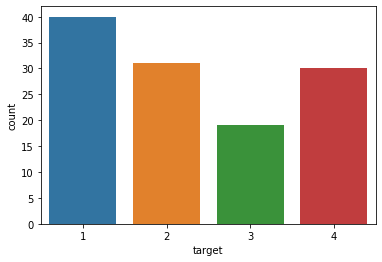

In [12]:
# Calculating the counts of each target catergory
sns.countplot(x= 'target', data = dataset)

The graph above shows the frequency distrubiton of the target outcomes. In our population, 1/3 participants has inflamation making in the most common diseases in our dataset. Around 25% has nephritis or neither diseases and around 16% has been diagnosed with both inflamation and nephritis.

In [13]:
# 1 Temp chart
dataset['Temp'].describe()

count    120.000000
mean      38.666667
std        1.925431
min       35.300000
25%       37.300000
50%       37.800000
75%       40.400000
max       41.400000
Name: Temp, dtype: float64

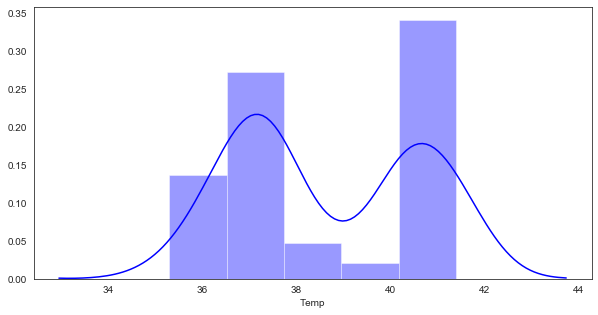

In [19]:
# 2 Temp graph
fig  = plt.subplots(1,1,figsize = (10,5))
sns.set_style("white")
sns.distplot(dataset['Temp'], kde = True, color = 'blue')
plt.show()

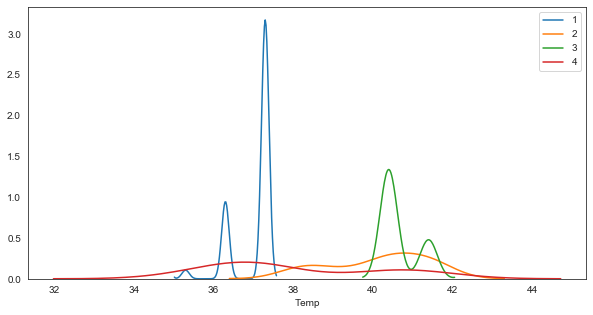

In [21]:
# 3 Temp graph
fig  = plt.subplots(1,1,figsize = (10,5))

for i in sorted(data.target.unique()):
    temp = data.query("target=={}".format(i))
    sns.distplot(temp['Temp'], label = i, hist = False)
plt.legend()
plt.show()

We only have one non-binary varaible in the dataset and that variable is temperature. To explore the temperature data, three differnt graphs and charts were created. The "1 Temp chart" shows the distribution of the temperature. Using the "1 Temp chart", we can conclude the temperature is skewed to the right. Even though the mean is 39C, the 25th percentile and 50th percentile is around 37C. To better see the skewness of temp distribution, a "2 Temp graph" is created. This graph shows two seperate normal distributions with means around 37C and 40C. To understand how the temperature is affecting the target column(four outcomes), "3 Temp graph" is created. This graph shows that all participants with inflamation has lower temperature (35C to 37.5C) while participants with inflamation only or both diseases have higher temperature(38.5C 41.4C). Lastly, participants without inflamation or nephritis can have low or high temperature and the cause of their temperature is not within the scope of our study.

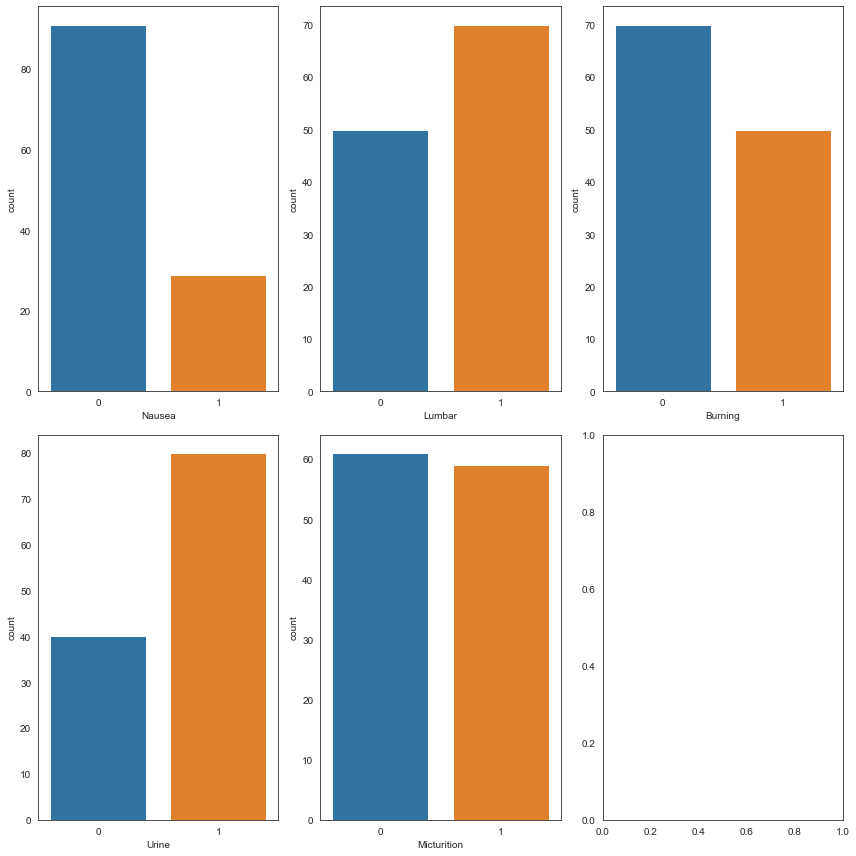

In [22]:
fig, ax = plt.subplots(2,3, figsize=(12,12), tight_layout = True)
sns.countplot(x= 'Nausea', data = dataset, ax = ax[0,0])
sns.countplot(x= 'Lumbar', data = dataset, ax = ax[0,1])
sns.countplot(x= 'Urine', data = dataset, ax = ax[1,0])
sns.countplot(x= 'Micturition', data = dataset, ax = ax[1,1])
sns.countplot(x= 'Burning', data = dataset, ax = ax[0,2])
plt.show()

So far, we have looked at only one non-binary variable. The graph above shows a distribution of our binary variables. Checking the "yes" or "no" count will given an idea of how well the data is divided. If every particpant in the study has all "yes" or "no" for a particular variable then that variable isn't worth including as an input. That variable doesn't give us any new information which will help us differentiate between our four target outcomes. Micturition, Lumbar and Buring are ideal distribution of around 50% for "0" and "1." Nauseau and Urine are more realistic. If these variable had greater than 85% frequency of "0" or "yes", further digging into data would be required to determine whether re-sampling is necessary. Given that isn't the case for any of our binary variables, we can move forward with the given data. 

In [24]:
bin_vars = list(dataset.columns[1:-1])
bin_vars

['Nausea', 'Lumbar', 'Urine', 'Micturition', 'Burning']

In [25]:
def getCounts(col1, col2):
    temp = dataset.pivot_table(index = [col1], columns=[col2],values='Temp',  aggfunc='count').reset_index(drop = True).fillna(0)
    same = temp.iloc[0,0] + temp.iloc[1,1]
    not_same = temp.iloc[1,0] + temp.iloc[0,1]
    return same, not_same

In [27]:
sns.__version__

'0.10.0'

In [ ]:
!pip install --upgrade 'seaborn==0.10.0'

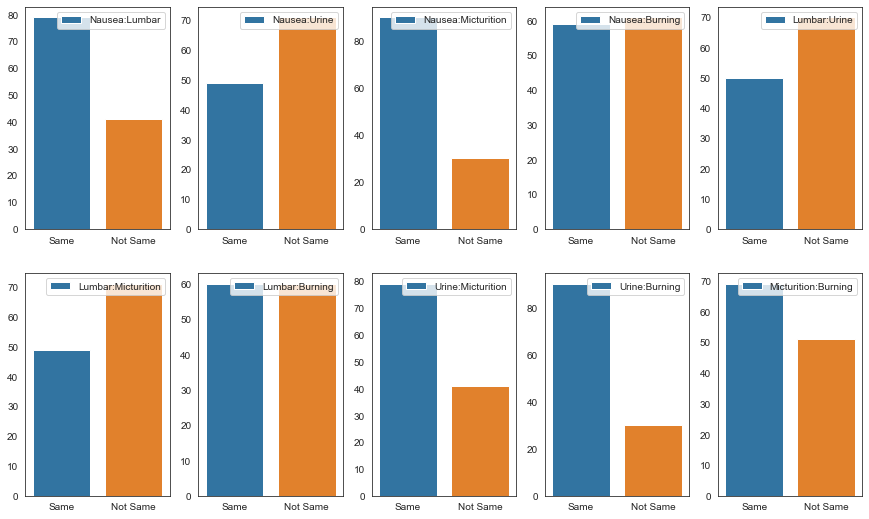

In [26]:
fig, ax = plt.subplots(2,5, figsize = (15,9))
counter = 0
for i, j in enumerate(bin_vars[:-1]):
    for k in bin_vars[i+1:]:
        sns.barplot(x=['Same','Not Same'], y=getCounts(j,k), label = "{}:{}".format(j,k), ax = ax[counter//5][counter%5])
        ax[counter//5][counter%5].legend()
        counter += 1

In [28]:
var15 = confusion_matrix(dataset['Nausea'], dataset['Burning'])
print("Occurrence of nausea vs. Burning of urethra:")
print(var15)
print(" ")
var25 = confusion_matrix(dataset['Burning'], dataset['Lumbar'])
print("Lumbar pain vs. Burning of urethra:")
print(var25)
print(" ")

Occurrence of nausea vs. Burning of urethra:
[[50 41]
 [20  9]]
 
Lumbar pain vs. Burning of urethra:
[[30 40]
 [20 30]]
 


The graphs above are testing the correlation between two binary input variables. The goal is remove any input variables at the mutually exclusive or subsets of each other. There are five binary input variables so 10 possible combinations (5 choose 2). Nausea/Burning and Lumbar/Burning from the graphs seems to be subsets of each other. To further investigate this, confusion matrix was created. With in confusion matrix, it can concluded that the same vs not same values are very close to each other but they are not mutually exclusive or subsets of each other.

# Traning and Test  Division

In [140]:
# Seperating out input variables vs. output variable
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 45)

#  Model Selection

By exploring the data, it can be easiy concluded that the best fit for the data will be a classification model. There will be four classes (target column). Below are four classification model we will build and then compare the accuracy to determine and the best model.
Models:
K nearest neighbor
Decision Tree
Support Vector Machines
Random Forest

In [147]:
#K Nearest Neighbor Model:
classifier_knn = KNeighborsClassifier(n_neighbors=4)
classifier_knn.fit(X_train, y_train)
scores_knn = cross_val_score(classifier_knn, X, y, cv=3)
y_pred_knn = cross_val_predict(classifier_knn, X, y, cv=3)
cm_knn = confusion_matrix(y, y_pred_knn)
print("Cross Validation Scores:")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_knn.mean(), scores_knn.std()))
print(" ")
print("Confusion Matrix:")
print(cm_knn)
print(" ")
print("Accuracy Percentage:")
print(accuracy_score(y, y_pred_knn)*100)

Cross Validation Scores:
0.81 accuracy with a standard deviation of 0.04
 
Confusion Matrix:
[[40  0  0  0]
 [ 7 18  6  0]
 [ 0  0 19  0]
 [ 0 10  0 20]]
 
Accuracy Percentage:
80.83333333333333


In [143]:
# Decision Tree
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)
scores_dt = cross_val_score(classifier_dt, X, y, cv=3)
y_pred_dt = cross_val_predict(classifier_dt, X, y, cv=3)
cm_dt = confusion_matrix(y, y_pred_dt)
print("Cross Validation Scores:")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_dt.mean(), scores_dt.std()))
print(" ")
print("Confusion Matrix:")
print(cm_dt)
print(" ")
print("Accuracy Percentage:")
print(accuracy_score(y, y_pred_dt)*100)

Cross Validation Scores:
0.86 accuracy with a standard deviation of 0.10
 
Confusion Matrix:
[[40  0  0  0]
 [ 0 24  0  7]
 [ 0  0 19  0]
 [ 0 10  0 20]]
 
Accuracy Percentage:
85.83333333333333


In [144]:
# Support Vector Machine
classifier_svc = SVC(kernel = 'linear', verbose = 1, random_state = 0)
classifier_svc.fit(X_train, y_train)
scores_svc = cross_val_score(classifier_svc, X, y, cv=3)
y_pred_svc = cross_val_predict(classifier_svc, X, y, cv=3)
cm_svc = confusion_matrix(y, y_pred_svc)
print("Cross Validation Scores:")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_svc.mean(), scores_svc.std()))
print(" ")
print("Confusion Matrix:")
print(cm_svc)
print(" ")
print("Accuracy Percentage:")
print(accuracy_score(y, y_pred_svc)*100)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Cross Validation Scores:
0.86 accuracy with a standard deviation of 0.10
 
Confusion Matrix:
[[40  0  0  0]
 [ 7 24  0  0]
 [ 0  0 19  0]
 [ 0 10  0 20]]
 
Accuracy Percentage:
85.83333333333333


In [145]:
# Random Forest
classifier_rf = RandomForestClassifier(n_estimators = 250, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)
scores_rf = cross_val_score(classifier_rf, X, y, cv=3)
y_pred_rf = cross_val_predict(classifier_rf, X, y, cv=3)
cm_rf = confusion_matrix(y, y_pred_rf)
print("Cross Validation Scores:")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_rf.mean(), scores_rf.std()))
print(" ")
print("Confusion Matrix:")
print(cm_rf)
print(" ")
print("Accuracy Percentage:")
print(accuracy_score(y, y_pred_rf)*100)

Cross Validation Scores:
0.92 accuracy with a standard deviation of 0.12
 
Confusion Matrix:
[[40  0  0  0]
 [ 0 31  0  0]
 [ 0  0 19  0]
 [ 0 10  0 20]]
 
Accuracy Percentage:
91.66666666666666


Random forest is the best model given its high average accuracy 